<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-msc/blob/main/homework/classwork-01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classwork 1 - QM for Nanosciences

## Names:

### Deadline:

Sunday 11th December 2022 (by 5pm)


### Instructions:

- The assignment should be written and submitted in groups of 2 people.


- When you finish, please add your names, download your ipynb file, and send it to my email: wbanda@yachaytech.edu.ec

### Problem 1

1. Write python functions to compute the spectral radiance of a body for different frequencies, $\nu$, and different (absolute) temperatures, $T$, according to the Rayleigh-Jeans and the Planck laws.


2. Add a label indicating the UV side of the spectrum.


3. Now, make the plots of spectral radiance versus wavelength, also for both laws.


4. Repeat the plot adding markers to show the expectation values according to Wien's displacement law for a couple of temperature-wavelength pairs.

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Import scipy to access physical constants
import scipy.constants as cte

### Rayleigh-Jeans law (classical equation):

$$B_{\lambda}= \frac{2ck_BT}{\lambda^4} $$



In [ ]:
# Check constants
# Documentation: https://docs.scipy.org/doc/scipy/reference/constants.html

print(cte.c) # speed of light in m/s
print(cte.k) # Boltzmann constant in SI units J/K

299792458.0
1.380649e-23


In [ ]:
# Vector for wavelengths (lambda values)

lb = np.arange(1.e-9, 5000.e-9, 1.e-9) # 1m=1.e-9nm

# Assign one single value to the temperature

tp = 5000 # in K

In [ ]:
c  = cte.c # fix light speed
kb = cte.k # fix Boltzmann constant

# Define function for spectral radiance

def rayleigh(lb, tp):

  B_l = (2*c*kb*tp)/(lb**4) #spectral radiance in SI units

  return B_l # values that we want the function to output

In [ ]:
# Create Y axis

rad = rayleigh(lb, tp)

In [ ]:
# Check sizes of the vectors

print(lb.shape, rad.shape)

(4999,) (4999,)


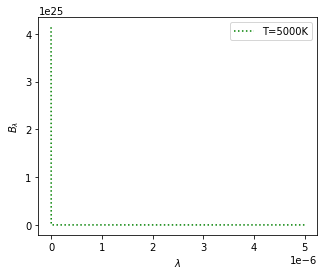

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (5,4))

# We plot
plt.plot(lb , rad, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Labels
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$B_{\lambda}$") # 'r' is to access latex notation

# Add limits to axes
#plt.xlim(0, 1000e-9)


# Add labels
plt.legend()

# We display the plot
plt.show()


### Planck's law:

$$B_\lambda =\frac{2hc^2}{\lambda^5}\frac 1{ \exp\left(\frac{hc}{\lambda k_\mathrm B T}\right) - 1}$$

In [ ]:
# Define Planck constant
h = cte.h # J s

print(h)

# Planck function
def planck(lb, tp):
  
  B_l = ((2*h*c**2)/(lb**5))*((1)/(np.exp((h*c)/(lb*kb*tp)) - 1)) #spectral radiance in SI units

  return B_l # values that we want the function to output

6.62607015e-34


In [ ]:
# Create Y axis

rad2 = planck(lb, tp)

<ipython-input-10-7c1ddda87ce5>:9: RuntimeWarning: overflow encountered in exp
  B_l = ((2*h*c**2)/(lb**5))*((1)/(np.exp((h*c)/(lb*kb*tp)) - 1)) #spectral radiance in SI units


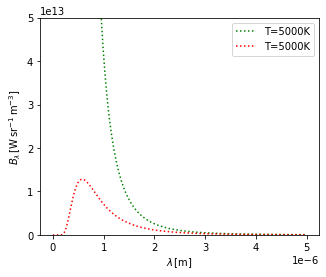

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (5,4))

# We plot
plt.plot(lb , rad, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')
plt.plot(lb , rad2, color='red', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Labels
plt.xlabel(r"$\lambda\,\rm[m]$")
plt.ylabel(r"$B_{\lambda}\,\rm [W\,sr^{-1}\,m^{-3}]$") # 'r' is to access latex notation

# Add limits to axes
#plt.xlim(0, 1000e-9)
plt.ylim(0, 5.e13)


# Add labels
plt.legend()

# We display the plot
plt.show()


In [ ]:
# Normalise axes to better units

lb_axis = lb*1.e9 # this in the x-axis in [nm]

# Below we work with the y-axis
rad1_axis = rad*1.e-12 # this is in units of [KW/m^2/nm/sr]
rad2_axis = rad2*1.e-12 # this is in units of [KW/m^2/nm/sr]

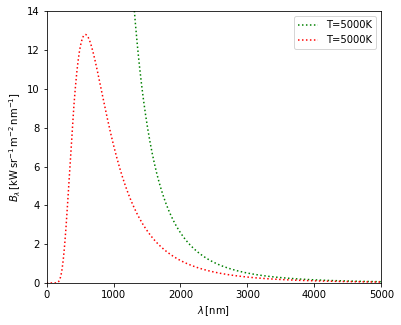

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (6,5))

# We plot
plt.plot(lb_axis , rad1_axis, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')
plt.plot(lb_axis , rad2_axis, color='red', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Labels
plt.xlabel(r"$\lambda\,\rm[nm]$")
plt.ylabel(r"$B_{\lambda}\,\rm [kW\,sr^{-1}\,m^{-2}\,nm^{-1}]$") # 'r' is to access latex notation

# Add limits to axes
plt.xlim(0, 5000)
plt.ylim(0, 1.4e1)


# Add labels
plt.legend()

# We display the plot
plt.show()


In [ ]:
# Define Wien's displacement law

# Fix b

b = 2.898e-3 # in meter*Kelvin

def wien(tp):

  # Peak lambda
  l_max = b/tp # in m

  return l_max

In [ ]:
# Print the value of wavelength

lm = wien(tp)

print(tp, lm)

5000 5.796e-07


In [ ]:
# Evaluate the spectral radiance in that value

rad_lm = planck(lm, tp)

print(tp, lm, rad_lm)

5000 5.796e-07 12798983170747.459


In [ ]:
# Normalise to the same units as before

lm_nm      = lm*1.e9 # in [nm]
rad_lm_new = rad_lm*1.e-12 # in [kW/m^2/sr/nm]

print(tp, lm_nm, rad_lm_new)

5000 579.6 12.798983170747459


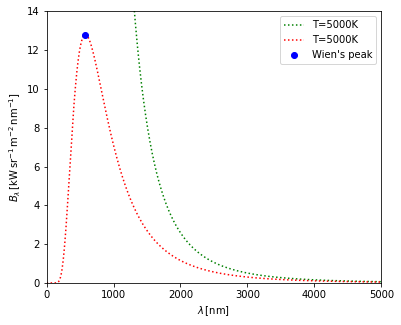

In [ ]:
# Plotting

# Creating figure environment with a customised size
fig = plt.figure(figsize = (6,5))

# We plot
plt.plot(lb_axis , rad1_axis, color='green', linestyle=':', label = f"T={tp}K") #, marker = 'o')
plt.plot(lb_axis , rad2_axis, color='red', linestyle=':', label = f"T={tp}K") #, marker = 'o')

# Add peak
plt.plot(lm_nm, rad_lm_new, color='blue', marker = 'o', linestyle=" ", label = "Wien's peak")

# Labels
plt.xlabel(r"$\lambda\,\rm[nm]$")
plt.ylabel(r"$B_{\lambda}\,\rm [kW\,sr^{-1}\,m^{-2}\,nm^{-1}]$") # 'r' is to access latex notation

# Add limits to axes
plt.xlim(0, 5000)
plt.ylim(0, 1.4e1)


# Add labels
plt.legend()

# We display the plot
plt.show()


### Problem 2

1. Make a plot of the Solar spectrum, which can be found here: https://github.com/wbandabarragan/quantum-mechanics-msc/blob/main/data/AM0AM1_5.csv

    **Hint:** Don't forget to consider the solid angle (we are far away from the Sun!).


2. Corroborate whether or not it follows Planck’s law. Is the Sun a black body?


3. What is the temperature of the Sun?

### Problem 3: Compton scattering

Suppose we have an experiment in which monochromatic light is scattered by an electron. Use python functions to carry. out the following calculations:

1. Find the shift in the wavelength of the light when the scattering angle is $30^{\circ}$.


2. If the incident light has a $\lambda=600\,\rm nm$ (i.e. photons are in the visible region), what is the fractional increase in the wavelength, $\frac{\Delta\lambda}{\lambda}$?


3. If the incident light has a $\lambda=0.05\,\rm nm$ (i.e. photons are in the X-ray region), what is the fractional increase in the wavelength, $\frac{\Delta\lambda}{\lambda}$?


4. Briefly exaplin, why were X-rays used by Compton in his experiments?

### Problem 4: Compton and de Broglie wavelengths

1. Calculate the Compton wavelength of an electron.


2. Calculate the Compton wavelength of a proton.


3. What can happen if you shine the above electron with a photon with that wavelength? Why?


4. Calculate the de Broglie wavelength of a (macro)particle of diameter $10\,\rm\mu m$ with a mass of $m=10^{-12}\,\rm kg$ that is moving at a speed of $50\,\rm mm\,s^{-1}$.


5. Based on the result above, are the wave properties of matter relevant in the macroscopic world? Why?

### Problem 5: The photoelectric effect

Consider an experiment of the photoelectric effect. The experiment consists of setting up an electric circuit embedding plates of different metals. We illuminate the first plate with a beam of photons of certain wavelength, $\lambda$, and as the photons interact with the metal plate, electrons are ejected from it. The electrons then reach the second plate and an electric current emerges. To prevent these electrons from reaching the second plate, we can increase the voltage until the electric current becomes zero in the circuit. The voltage value at which this happens is called "stopping potential", $V_0$, which is defined as the potential needed to stop the photo-electrons with the largest kinetic energy (so $K_{max}=e\,V_0$) at a specific wavelength $\lambda$.

Report all the answers in SI units, and recall that the Planck constant is $h=6.626\times 10^{-34}\,\rm J\,s$, the speed of light is $c=3\times 10^{8}\,\rm m\,s^{-1}$, the electron mass is $m_e=9.11\times 10^{-31}\,\rm kg$, and the electron charge in $e=1.6\times 10^{-19}\,\rm c$.

### **1. Experiment (4 points):**

Carry out the experiment and collect $10$ data points for $2$ different metals using this applet:

https://applets.kcvs.ca/photoelectricEffect/PhotoElectric.html

To collect the data, choose a metal, fix a wavelength, and vary the voltage until the current becomes zero. When this happens, push "record data points". Then, vary the wavelength and repeat the process. When you have 10 data points for the first metal, choose another metal and repeat the experiment. At the end, you should have a data table with 20 data points, 10 for each metal. Export the CSV file with the data, place it into your working directory.


### **2. Data I/O (4 points):**

Using a Python notebook, open and read the CSV data file containing the data from the experiment, and make two high-quality labeled scattered plots, one for each metal, with the maximum kinetic energy ($K_{\rm max}$) in the Y-axis and frequency on the X-axis. Note: use markers to display the experimental data.


### **3. Regression and fitting (4 points):**

(a) For each metal, define a good model to describe the data. Then, use Python functions to carry out a regression and find a funtion that fits the data. 

(b) Report the equations for each metal and make two high-quality labeled plots, one for each metal, containing the experimental data and the fitting function. Note: Use markers for the experimental data and lines for the fitting functions.

(c) Then, make a new figure combining the data and fitting functions for both metals. Which metal has a higher cutoff frequency? Remember that the cutoff frequency is the critical frequency needed to remove electrons from the metal piece, below it we do not remove any.


(d) Compare the values of the slopes of the fitted curves. What do you find? What does the slope of the curves represent?


### **4. Calculations (4 points):**

Using the fitting functions calculated in (3), carry out the following calculations in Python:

a) Calculate the work function, $\phi$, for each metal, and the relative errors with respect to the known values (use the Internet to research what these values are). Remember that the work function is the (threshold) energy needed to remove electrons from the metal piece.


b) Calculate the cutoff wavelength, $\lambda_{\rm cutoff}$, for each metal. Remember that the cutoff wavelength is the critical wavelength needed to remove electrons from the metal piece, above which we do not remove any.


c) Calculate the maximum speed of the electrons ejected from the metal pieces for two light beams of $\lambda_1=300\rm nm$ and $\lambda_2=700\rm nm$.


d) Make a combined graph of $K_{\rm max}$ versus $\lambda$, for both metals, labeling the data points for both light beams.